<a href="https://colab.research.google.com/github/borajeong88/Personal_Project/blob/main/Titanic_Project_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%94%A5%EB%9F%AC%EB%8B%9D%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9E%85%EB%AC%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 배운 것

1) Train 데이터와 Test 데이터를 concat 으로 합칠 때, 구분을 위해 별도의 열을 추가  
2) 집계나 데이터 분포를 위해 힘들게 데이터 가공할 필요 없이** sns.countplot** 이나 **sns.barplot** 바로 사용 가능 **(그냥 데이터프레임 그대로 사용 가능)**  
 3) 레이블 인코딩 시, 나는 replace 를 많이 이용했는데 그렇게 안하고, .loc 으로 데이터 추출 후 그 추출된 구간을 새로운 값으로 변경 (단, 고유값이 제한되어 있는 경우)  
4)**다양한 피처 사용**(나는 주로 숫자형 데이터에만 치중, 그러나 저자는 내가 버린 많은 피처 들 (**Cabin 이나 Name, Embarked, 심지어 Ticket 까지**) **Survived 와의 관련성을 탐색함...**
5) 모델을 학습 시킨 후 x_test 만 넣고 y_test, y_hat 만 비교하는 것이 아닌, x_train 까지 넣고, y_train 및 y_train_pred 까지 비교 -> 그래서 모델이 과적합 되었는지 여부까지 판단 (Train 데이터만 예측이 높다면 과적합화)


### 구글 드라이브 파일 시스템에 마운트

In [ ]:
 # 구글 드라이브 파일 시스템에 마운트

 from google.colab import drive
 drive.mount('/gdrive/')

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


### 데이터 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive_path = '/gdrive/My Drive/'

train = pd.read_csv(drive_path + '데이터분석프로젝트/Titanic/train.csv')
test = pd.read_csv(drive_path + '데이터분석프로젝트/Titanic/test.csv')
submission = pd.read_csv(drive_path + '데이터분석프로젝트/Titanic/submission.csv')

print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Train 데이터, Test 데이터 결합

In [ ]:
# 타이타닉 전체 데이터셋 준비

train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'

data = pd.concat([train, test], axis=0)
print(data.shape)

(1309, 13)


### 데이터 전처리

In [ ]:
# 숫자형 피처 추출

data_num = data.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

# 결측값 대체

data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())# 평균값으로 결측값 대체
data_num['Fare'] = data_num['Fare'].fillna(data_num['Age'].mode()[0]) # 최빈값으로 결측값 대체

# 학습용 데이터와 테스트 데이터 구분

selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

X_train = data_num.loc[data['TrainSplit'] == 'Train', selected_features]
y_train = data_num.loc[data['TrainSplit'] == 'Train', 'Survived']

X_test = data_num.loc[data['TrainSplit'] == 'Test', selected_features]

print('Train 데이터셋 크기: ', X_train.shape, y_train.shape)
print('Test 데이터셋 크기: ', X_test.shape)

Train 데이터셋 크기:  (891, 5) (891,)
Test 데이터셋 크기:  (418, 5)


<ipython-input-8-cf6b46024b35>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


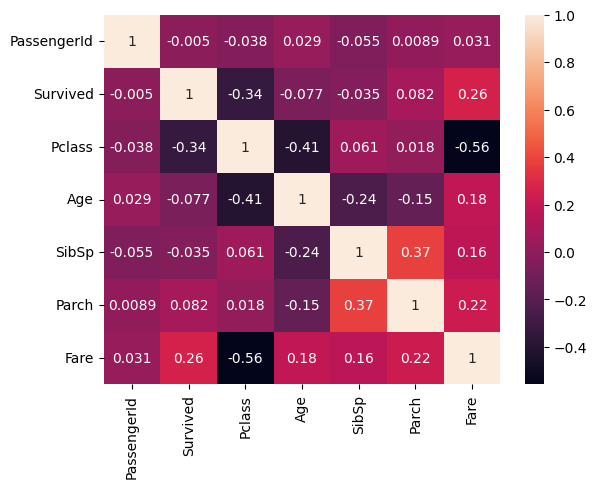

In [ ]:

sns.heatmap(data.corr(), annot=True)

plt.show()

### 피처 엔지니어링 + EDA

* 피처를 살펴보면서 모델 학습에 맞도록 전처리
* 모델 성능을 개선할 수 있는 여러 가지 방법 적용

**1) 생존여부 파악**

In [ ]:
train['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

**2) 객실 등급**

2)-1. 객실 등급별 인원 분포 (data)

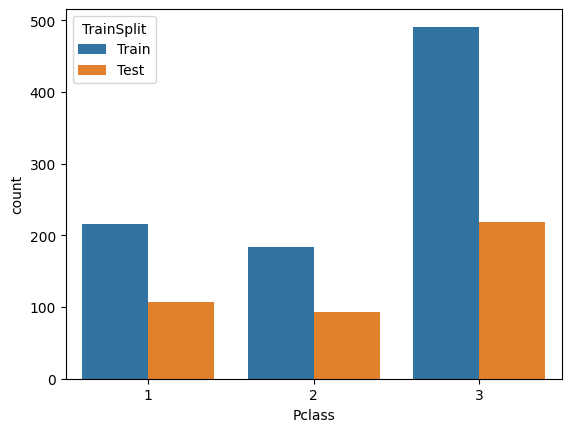

In [ ]:
# train - test 데이터 분포

sns.countplot(x='Pclass', hue='TrainSplit', data=data)
plt.show()

2)-2. 객실 등급별 생존자, 사망자 분포 (Train 데이터)

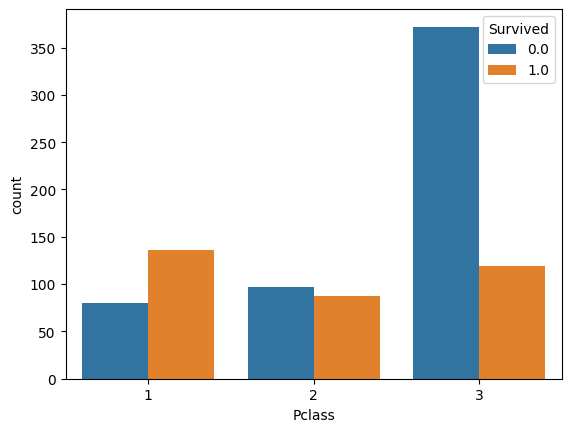

In [ ]:
# Pclass 별 survived 여부

sns.countplot(x='Pclass', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

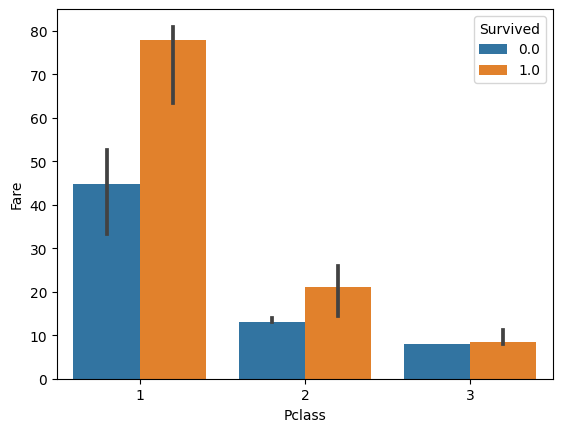

In [ ]:
# Pclass 별 Fare 객실 요금의 중간값 비교

sns.barplot(x='Pclass', y='Fare', hue='Survived',
            data = data[data['TrainSplit']=='Train'], estimator=np.median)

plt.show()

**3) 성별**

3)-1. 성별에 따른 생존자 분포 파악

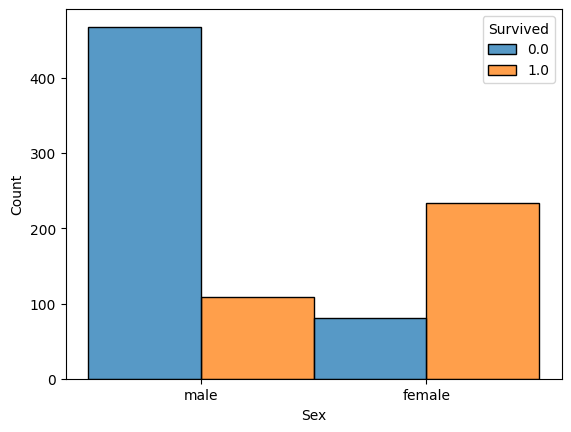

In [ ]:
# histplot 함수

sns.histplot(x='Sex', hue='Survived', multiple='dodge',  # dodge 를 설정하면 그래프가 겹치지 않게 해 줌
            data = data[data['TrainSplit']=='Train'])

plt.show()

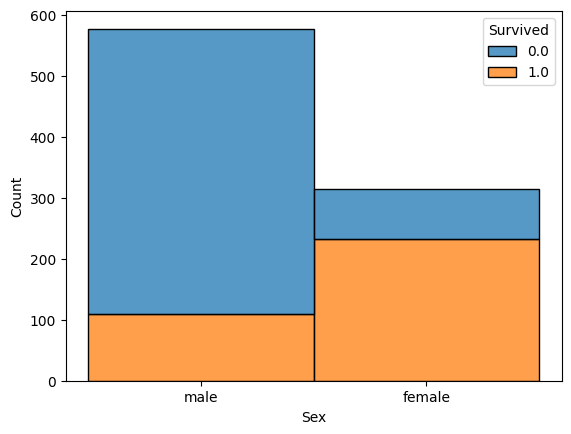

In [ ]:
# histplot 함수

sns.histplot(x='Sex', hue='Survived', multiple='stack', # stack 을 설정시 그래프가 상하로 누적
             data=data[data['TrainSplit']=='Train'])

plt.show()

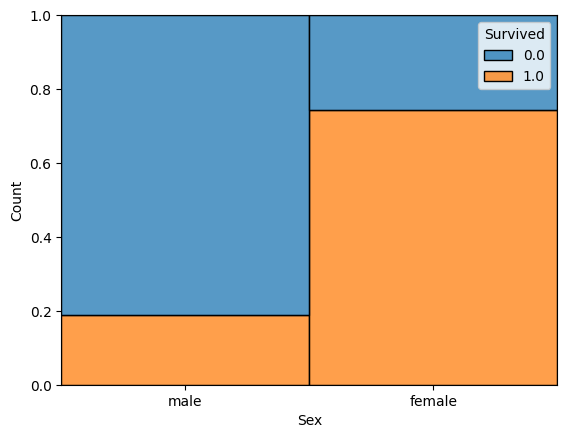

In [ ]:
# histplot 함수

sns.histplot(x='Sex', hue='Survived', multiple='fill', # fill 을 설정시 그래프가 상하로 누적
             data=data[data['TrainSplit']=='Train'])

plt.show()

3)-2. 성별의 문자열 데이터를 숫자형 데이터로 전환
female -> 0, male -> 1

In [ ]:
# 레이블 인코딩 (female: 0, male: 1)

data.loc[data['Sex']=='female', 'Sex'] = 0
data.loc[data['Sex'] == 'male', 'Sex'] = 1

data['Sex'] = data['Sex'].astype('int')

# 성별 분포 확인

data['Sex'].value_counts()

1    843
0    466
Name: Sex, dtype: int64

**4) 이름**

4)-1. 이름을 가지고 Title 추출 및 정리

In [ ]:
# Name 의 고유값 확인

data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [ ]:
# Name 의 문자열을 쉼표를 기준으로 분할, 뒷 부분을 title name 에 할당

title_name = data['Name'].str.split(",", expand=True)[1]
title_name

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
413                                      Mr. Woolf
414                                  Dona. Fermina
415                            Mr. Simon Sivertsen
416                                  Mr. Frederick
417                              Master. Michael J
Name: 1, Length: 1309, dtype: object

In [ ]:
# title_name 을 다시 . 을 기준으로 분할

title_name.str.split(".", expand=True)

,0,1,2
0,Mr,Owen Harris,None
1,Mrs,John Bradley (Florence Briggs Thayer),None
2,Miss,Laina,None
3,Mrs,Jacques Heath (Lily May Peel),None
4,Mr,William Henry,None
...,...,...,...
413,Mr,Woolf,None
414,Dona,Fermina,None
415,Mr,Simon Sivertsen,None
416,Mr,Frederick,None


In [ ]:
# 위에서 분할한 title name 중 앞부분 (Mr, miss) 만 추출

title = title_name.str.split(".", expand=True)[0]
title.value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: 0, dtype: int64

In [ ]:
# title name 의 고유수를 통일 시키기

title = title.replace([' Ms','Miss'],' Miss')
title = title.replace([' Mlle', ' the Countess', ' Lady', ' Don', ' Dona', ' Mme', ' Sir', ' Jonkheer'], ' Noble')
title = title.replace([' Col', ' Major', ' Capt'], ' Officer')
title = title.replace([' Dr', ' Rev'], ' Priest')

data['Title'] = np.array(title)
data['Title'].value_counts(dropna=False)

 Mr         757
 Miss       262
 Mrs        197
 Master      61
 Priest      16
 Noble        9
 Officer      7
Name: Title, dtype: int64

In [ ]:
#title = title.replace({'Mlle', 'the Countess', 'Lady', 'Don', 'Dona', 'Mme', 'Sir', 'Jonkheer'], 'Noble')
#title = title.replace(['Col', 'Major', 'Capt'], 'Officer')
#title = title.replace(['Dr', 'Rev'], 'Priest')

#data['Title'] = np.array(title)
#data['Title'].value_counts(dropna=False)

In [ ]:
np.unique(title, return_counts=True)

(array([' Master', ' Miss', ' Mr', ' Mrs', ' Noble', ' Officer', ' Priest'],
       dtype=object),
 array([ 61, 262, 757, 197,   9,   7,  16]))

4)-2. Title 분포 그래프

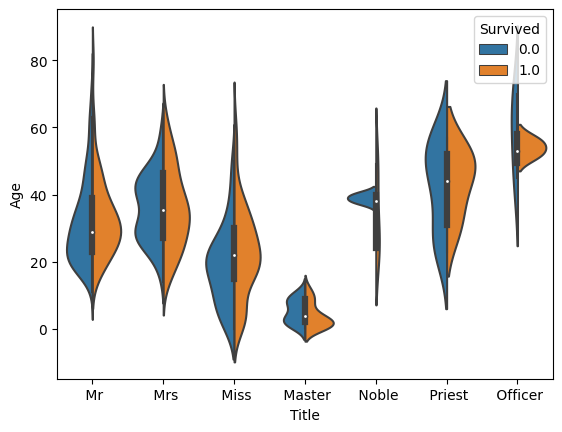

In [ ]:
sns.violinplot(x='Title', y='Age', hue='Survived', data=data, split=True)
plt.show()

In [ ]:
data.drop('Name', axis=1, inplace=True)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TrainSplit', 'Title'],
      dtype='object')

 **5) 나이**

5)-1. 나이 (Age)열 결측값 처리

Age 의 결측값을 확인 후, 같은 타이틀을 갖는 승객끼리 그룹을 나누고, 그룹별 승객 나이의 중간값으로 결측값을 대체한다.

In [ ]:
for title in data['Title'].unique():

  # 결측값 개수 확인
  print("%s 결측값 개수:" % title, data.loc[data['Title']==title, :]['Age'].isnull().sum())

  # 결측값 중간값으로 대체
  age_median = data.loc[data['Title']==title, 'Age'].median()
  data.loc[data['Title']==title, 'Age'] = data.loc[data['Title']==title, 'Age'].fillna(age_median)

  # 결측값 처리 여부 확인
  print("\n")
  print("Age 열의 결측값 개수: ", data['Age'].isnull().sum())

 Mr 결측값 개수: 176


Age 열의 결측값 개수:  87
 Mrs 결측값 개수: 27


Age 열의 결측값 개수:  60
 Miss 결측값 개수: 51


Age 열의 결측값 개수:  9
 Master 결측값 개수: 8


Age 열의 결측값 개수:  1
 Noble 결측값 개수: 0


Age 열의 결측값 개수:  1
 Priest 결측값 개수: 1


Age 열의 결측값 개수:  0
 Officer 결측값 개수: 0


Age 열의 결측값 개수:  0


5)-2. 나이 (Age) 히스토그램 그리기

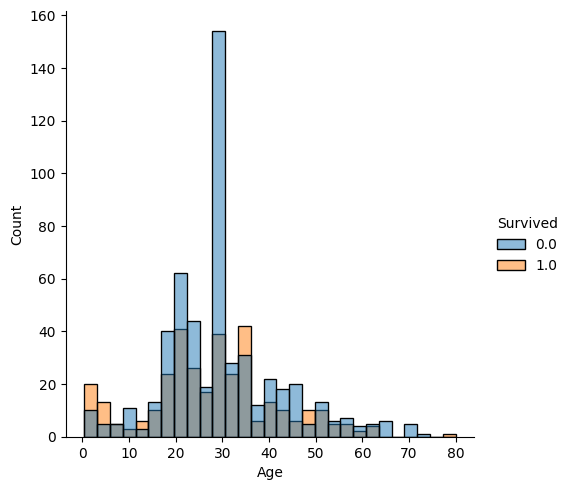

In [ ]:
# Age 분포

sns.displot(x='Age', kind='hist', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

5-3) 나이 (Age) 열의 데이터를 여러 구간으로 나눈 후 그리기 (Binning)

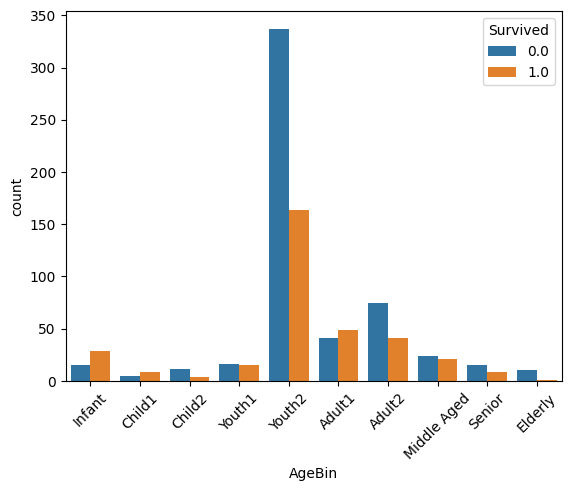

In [ ]:
# Binning - 구간 나누기

bins = [0, 4, 8, 12, 16, 32, 36, 48, 56, 64, 100]
labels=['Infant', 'Child1', 'Child2', 'Youth1', 'Youth2', 'Adult1', 'Adult2', 'Middle Aged', 'Senior', 'Elderly']

data['AgeBin'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Age_bin(나이 구간) 에 따른 생존율 비교

sns.countplot(x='AgeBin', hue='Survived', data=data[data['TrainSplit']=='Train'])


plt.xticks(rotation=45)
plt.show()

 **6) 형제자매 배우자**

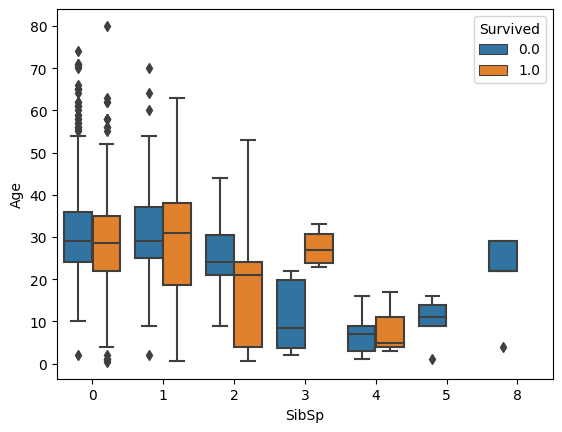

In [ ]:
sns.boxplot(x='SibSp', y='Age', hue='Survived', data=data)
plt.show()

**7) 부모 자식**

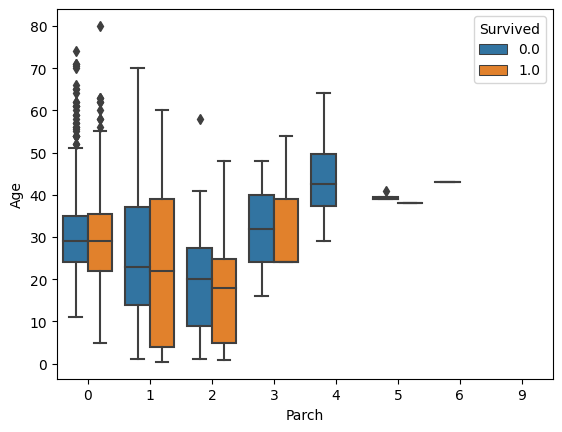

In [ ]:
sns.boxplot(x='Parch', y='Age', hue='Survived', data=data)
plt.show()

**7)-2. 가족 수와 객실 등급 기준으로 생존율 차이 확인**

* 형제 자매와 부모를 더하여서 함께 탑승한 모든 가족의 수를 계산

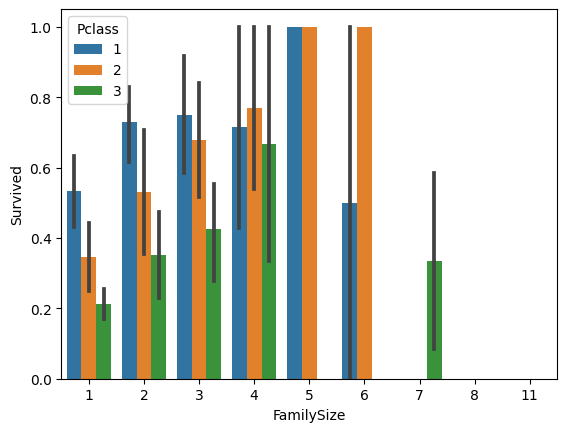

In [ ]:
# 가족 구성원 수
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# 가족 구성원 수와 생존율 관계
sns.barplot(x='FamilySize', y='Survived', hue='Pclass',data = data[data['TrainSplit']=='Train'], estimator=np.mean)

plt.show()

**8) 요금(Fare)**


**8)-1 요금 결측치 채우기**

* Fare 에는 1개의 결측 데이터가 있다.
* 결측 데이터를 3등석 요금의 평균으로 채워 준다.

In [ ]:
# 결측 데이터 확인

data.loc[data['Fare'].isnull(), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize
152,1044,NaN,3,1,60.5,0,0,3701,NaN,NaN,S,Test,Mr,Senior,1


In [ ]:
# 3등석 요금의 평균값을 가지고 결측값 대체

p3_fare_mean = data.loc[data['Pclass']==3, 'Fare'].mean()

print(p3_fare_mean)

data['Fare'] = data['Fare'].fillna(p3_fare_mean)

data.loc[data['PassengerId']==1044, :]

13.302888700564973


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize
152,1044,NaN,3,1,60.5,0,0,3701,13.302889,NaN,S,Test,Mr,Senior,1


**8)-2 요금(Fare) 에 대해 밀도 함수를 통해 분포 살피기**


<Figure size 2000x1000 with 0 Axes>

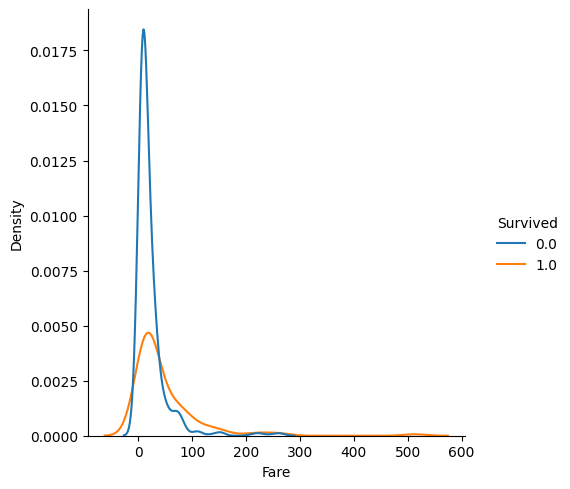

In [ ]:
plt.figure(figsize=(20, 10))

sns.displot(x='Fare', kind='kde', hue='Survived', color=['orange', 'blue'], data=data[data['TrainSplit']=='Train'])

plt.show()

Fare 값에 대해 비대칭 분포를 정규화 해서 로그 변환을 해보자. Numpy 의 loglp 함수를 이용, Fare 열의 데이터에 로그를 취한다.

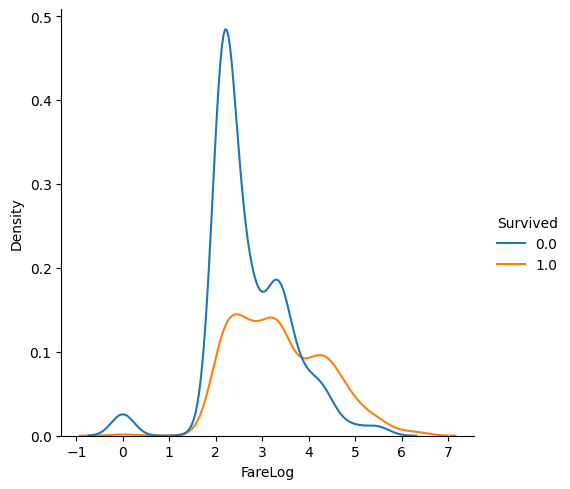

In [ ]:
# Fare 에 대해 로그 변환

data['FareLog'] = np.log1p(data['Fare'])

# 로그 변환한 Fare 값에 대해 밀도 함수 그리기

sns.displot(x='FareLog', kind='kde', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

**8)-3 요금(Fare) 에 대해 strip 함수를 통해 객실 등급 별로 분포 살피기**

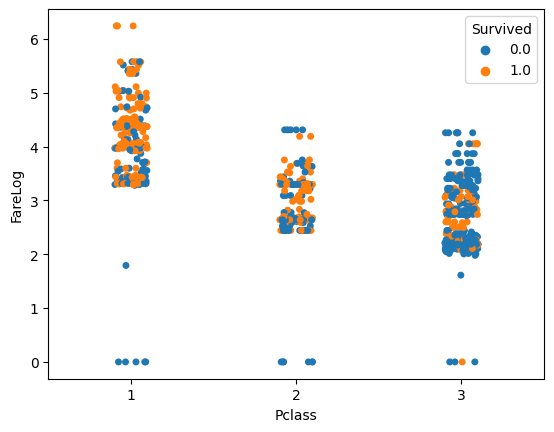

In [ ]:
sns.stripplot(x='Pclass', y='FareLog', hue='Survived', data=data[data['TrainSplit']=='Train'])
plt.show()

**9) 탑승 항구(Embarked)**

**9)-1 Embarked 에 대한 결측값을 확인해보자**

In [ ]:
data.loc[data['Embarked'].isnull(), :]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize,FareLog
61,62,1.0,1,0,38.0,0,0,113572,80.0,B28,NaN,Train,Miss,Adult2,1,4.394449
829,830,1.0,1,0,62.0,0,0,113572,80.0,B28,NaN,Train,Mrs,Senior,1,4.394449


**9)-2 탑승자가 많은 항구인 'S' 값으로 결측값을 채우자**

In [ ]:
# 탑승자가 가장 많은 항구는 mode() 로 알아본다.

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked'].value_counts(dropna=False)

S    916
C    270
Q    123
Name: Embarked, dtype: int64

**9)-3 탑승 항구 별로 생존자 비교**

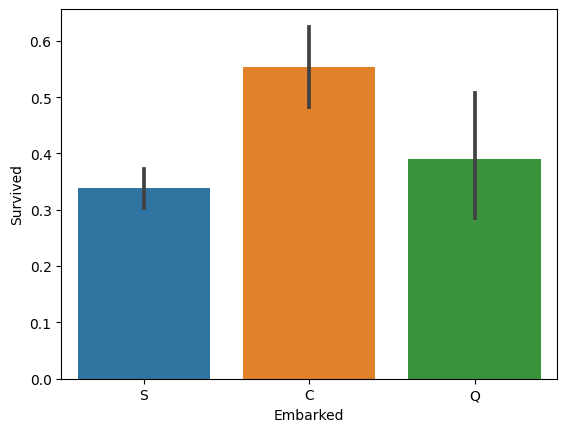

In [ ]:
sns.barplot(x='Embarked', y='Survived', estimator=np.mean, data=data[data['TrainSplit']=='Train'])
plt.show()

**9)-3-2 탑승 항구 별로 생존자 비교**

* Seaborn 의 catplot 함수의 kind 옵션을 'point' 로 설정하면 클래스별 데이터 중심과 분산을 비교할 수 있다.

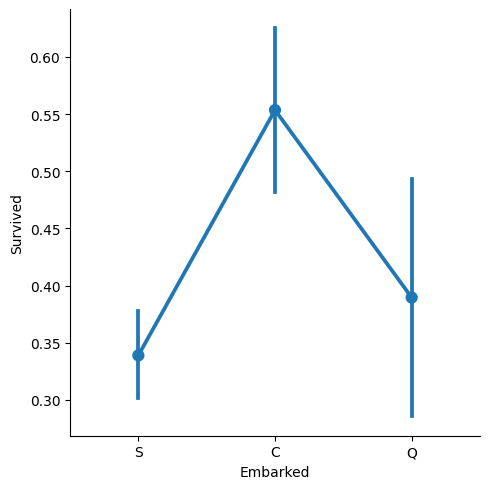

In [ ]:
sns.catplot(x='Embarked', y='Survived', kind='point',data=data[data['TrainSplit']=='Train'])
plt.show()

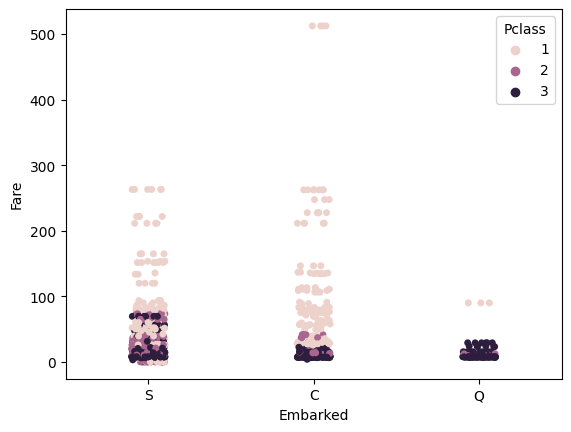

In [ ]:
# 갑자기 궁금해서... 그렇다면 1st class 사람들이 embarked 된 곳이 c 가 많았던 게 아닐까?
# S 에서도 많이 타긴 했지만 1등급 사람들의 상대적 탑승 '비율'이 C 가 높았다.

sns.stripplot(x='Embarked',  y='Fare', hue='Pclass', data=data)
plt.show()

**10) 객실 구역(Cabin)**

**10-1) 객실 구역 데이터 살피기**

Cabin 열은 객실 구역을 나타내는 알파벳과 숫자로 이루어진다.

In [ ]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

str 속성으로 문자열 첫 글자만 선택해보고, 각 알파벳이 얼마나 있는지 고유값을 살펴보자. Null 값이 많음을 알 수 있다.

In [ ]:
data['Cabin'].str.slice(0, 1).value_counts(dropna=False)

NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: Cabin, dtype: int64

**10-2) 객실 구역 결측값 U 로 대체 후 객실 구역별 생존율 비교**

결측값은 U로 대체한다.

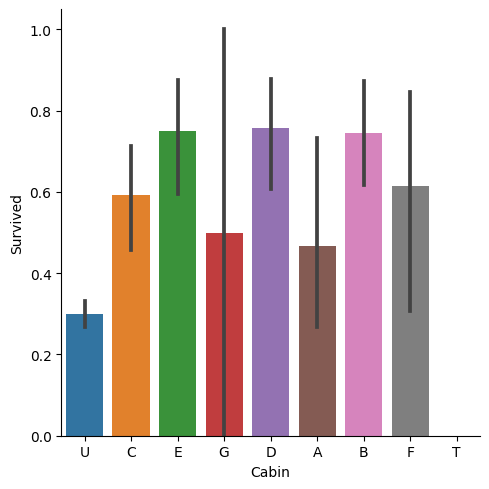

In [ ]:
# 결측값 U 로 대체
data['Cabin'] = data['Cabin'].str.slice(0, 1)
data['Cabin'] = data['Cabin'].fillna('U')

# Cabin 구역별 생존율 비교

sns.catplot(x='Cabin', y='Survived', kind='bar', data=data[data['TrainSplit']=='Train'])
plt.show()

**11) 탑승권(Ticket)**

In [ ]:
data['Ticket'].value_counts(dropna=False)

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [ ]:
data['Ticket'] = data['Ticket'].str.replace(".","").str.replace("/","")
data['Ticket'] = data['Ticket'].str.strip().str.split(' ').str[0]
data['Ticket'].value_counts(dropna=False)

<ipython-input-46-7e3deb94fafa>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Ticket'] = data['Ticket'].str.replace(".","").str.replace("/","")


PC         92
CA         68
A5         28
SOTONOQ    24
WC         15
           ..
239854      1
4134        1
11771       1
65304       1
359309      1
Name: Ticket, Length: 741, dtype: int64

In [ ]:

#data['Ticket'] = data['Ticket'].str.replace(".","").str.replace("/","") #.(마침표) 나 / 를 공백으로 치환
#data['Ticket'] = data['Ticket'].str.strip().str.split(' ').str[0]
#data['Ticket'].value_counts(dropna=False)

In [ ]:
data.loc[data['Ticket'].str.isdigit(), 'Ticket'] = 'NUM'
data['Ticket'].value_counts(dropna=False)

NUM        957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
SCPARIS     14
STONO       14
A4          10
FCC          9
C            8
SOC          8
SOPP         7
STONO2       7
SCParis      5
SCAH         5
PP           4
LINE         4
WEP          4
FC           3
SOTONO2      3
SCA4         2
SWPP         2
PPP          2
SC           2
SCA3         1
A            1
LP           1
AQ4          1
STONOQ       1
Fa           1
CASOTON      1
AS           1
SCOW         1
SOP          1
SP           1
AQ3          1
Name: Ticket, dtype: int64

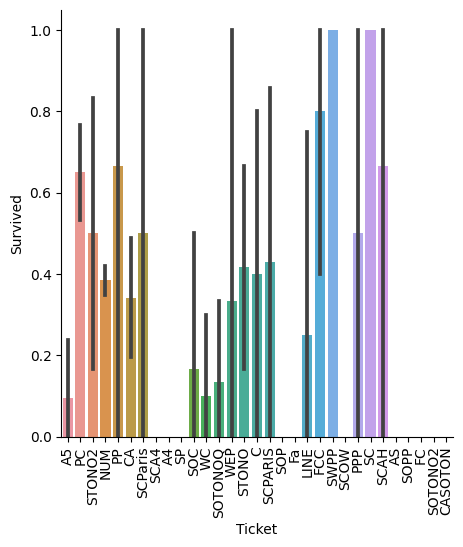

In [ ]:
sns.catplot(x='Ticket', y='Survived', kind='bar', data=data[data['TrainSplit']=='Train'])
plt.xticks(rotation=90)
plt.show()

### 데이터 전처리

* 레이블 인코딩
* 원핫 인코딩
* 피처 스케일링

**1) 레이블 인코딩**

* **Title 열**과 **AbeBin 열**의 **범주형 데이터를 숫자 레이블로** 바꾼다.
* Sklearn 의 LabelEncoder 객체를 만들고, fit_transform 함수를 사용하여 각 열의 데이터에 적용한다.

In [ ]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

for col in ['Title', 'AgeBin']:
  encoder = LabelEncoder()
  data[col] = encoder.fit_transform(data[col])


In [ ]:
data.loc[:, ['Title', 'AgeBin']].head()

,Title,AgeBin
0,2,9
1,3,1
2,1,9
3,3,0
4,2,0


**2) 원핫 인코딩**

* 문자열 데이터를 숫자형 데이터로 변환하는 또다른 방법
* pandas get_dummies 함수 사용

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TrainSplit,Title,AgeBin,FamilySize,FareLog
0,1,0.0,3,1,22.0,1,0,A5,7.2500,U,S,Train,2,9,2,2.110213
1,2,1.0,1,0,38.0,1,0,PC,71.2833,C,C,Train,3,1,2,4.280593
2,3,1.0,3,0,26.0,0,0,STONO2,7.9250,U,S,Train,1,9,1,2.188856
3,4,1.0,1,0,35.0,1,0,NUM,53.1000,C,S,Train,3,0,2,3.990834
4,5,0.0,3,1,35.0,0,0,NUM,8.0500,U,S,Train,2,0,1,2.202765


In [ ]:
# columns 속성에 원핫 인코딩할 열 이름을 입력한다.
# prefix 옵션은 생성될 열 이름의 앞부분을 지정한다.
# drop_first 옵션을 True 로 지정하면 첫번째 열 삭제한다.

onehot_prefix = []

for col in ['Embarked', 'Cabin', 'Ticket']:
  data[col] = data[col].astype('category') # 위 열들의 데이터를 일단 category 타입으로 변환
  data = pd.get_dummies(data, columns=[col], prefix = col[:3], drop_first=True)
  onehot_prefix.append(col[:3])

In [ ]:
print(onehot_prefix)

['Emb', 'Cab', 'Tic']


In [ ]:
test = data.loc[:,[col for col in data.columns if col[:3] in onehot_prefix]]
print(test.columns)
print(len(test.columns))

Index(['Emb_Q', 'Emb_S', 'Cab_B', 'Cab_C', 'Cab_D', 'Cab_E', 'Cab_F', 'Cab_G',
       'Cab_T', 'Cab_U', 'Tic_A4', 'Tic_A5', 'Tic_AQ3', 'Tic_AQ4', 'Tic_AS',
       'Tic_C', 'Tic_CA', 'Tic_CASOTON', 'Tic_FC', 'Tic_FCC', 'Tic_Fa',
       'Tic_LINE', 'Tic_LP', 'Tic_NUM', 'Tic_PC', 'Tic_PP', 'Tic_PPP',
       'Tic_SC', 'Tic_SCA3', 'Tic_SCA4', 'Tic_SCAH', 'Tic_SCOW', 'Tic_SCPARIS',
       'Tic_SCParis', 'Tic_SOC', 'Tic_SOP', 'Tic_SOPP', 'Tic_SOTONO2',
       'Tic_SOTONOQ', 'Tic_SP', 'Tic_STONO', 'Tic_STONO2', 'Tic_STONOQ',
       'Tic_SWPP', 'Tic_WC', 'Tic_WEP'],
      dtype='object')
46


**3) 피처 스케일링**

* 사이킷런 MinMaxScaler 를 사용하여 모델 학습에 사용할 피처의 스케일을 0~1 범위로 정규화 처리 한다.
* 학습에 사용할 피처가 아닌 TrainSplit 열을 제외한다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 스케일링 처리할 피처 선택 - TrainSplit 등 일부 열 제외 (PassengerId, Survived, TrainSplit 열 제외)

scaled_cols = [col for col in data.loc[:, 'Pclass':].columns if col !='TrainSplit']   # Pclass 이후 부터 열을 선택하되, 해당 열은 TrainSplit 가 아니여야 한다

data_scaled = data.loc[:, scaled_cols]
data_scaled = scaler.fit_transform(data_scaled) #MinMaxScaler 를 이용하여 위에서 select 한 칼럼들을 피처 스케일링

# 스케일링 변환된 값을 데이터 프레임에 반영

data.loc[:, scaled_cols] = data_scaled[:, :]
data.head()

<ipython-input-56-82f31ea4554b>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, scaled_cols] = data_scaled[:, :]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,TrainSplit,Title,...,Tic_SOPP,Tic_SOTONO2,Tic_SOTONOQ,Tic_SP,Tic_STONO,Tic_STONO2,Tic_STONOQ,Tic_SWPP,Tic_WC,Tic_WEP
0,1,0.0,1.0,1.0,0.273456,0.125,0.0,0.014151,Train,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,0.0,0.473882,0.125,0.0,0.139136,Train,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,1.0,0.0,0.323563,0.000,0.0,0.015469,Train,0.166667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1.0,0.0,0.0,0.436302,0.125,0.0,0.103644,Train,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,1.0,1.0,0.436302,0.000,0.0,0.015713,Train,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 모델 학습

* 피처 선택
* Train, Test 데이터 분할
* 모델 학습

1) 피처 선택

모델 학습에 사용할 피처를 선택한다. 총 54개 이다.

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'TrainSplit', 'Title', 'AgeBin', 'FamilySize', 'FareLog',
       'Emb_Q', 'Emb_S', 'Cab_B', 'Cab_C', 'Cab_D', 'Cab_E', 'Cab_F', 'Cab_G',
       'Cab_T', 'Cab_U', 'Tic_A4', 'Tic_A5', 'Tic_AQ3', 'Tic_AQ4', 'Tic_AS',
       'Tic_C', 'Tic_CA', 'Tic_CASOTON', 'Tic_FC', 'Tic_FCC', 'Tic_Fa',
       'Tic_LINE', 'Tic_LP', 'Tic_NUM', 'Tic_PC', 'Tic_PP', 'Tic_PPP',
       'Tic_SC', 'Tic_SCA3', 'Tic_SCA4', 'Tic_SCAH', 'Tic_SCOW', 'Tic_SCPARIS',
       'Tic_SCParis', 'Tic_SOC', 'Tic_SOP', 'Tic_SOPP', 'Tic_SOTONO2',
       'Tic_SOTONOQ', 'Tic_SP', 'Tic_STONO', 'Tic_STONO2', 'Tic_STONOQ',
       'Tic_SWPP', 'Tic_WC', 'Tic_WEP'],
      dtype='object')

In [ ]:
selected_features = ['Pclass', 'Sex', 'SibSp', 'Parch',
                    'Title', 'AgeBin', 'FamilySize', 'FareLog',
                    'Emb_Q', 'Emb_S', 'Cab_B', 'Cab_C', 'Cab_D', 'Cab_E', 'Cab_F', 'Cab_G',
                    'Cab_T', 'Cab_U', 'Tic_A4', 'Tic_A5', 'Tic_AQ3', 'Tic_AQ4', 'Tic_AS',
                    'Tic_C', 'Tic_CA', 'Tic_CASOTON', 'Tic_FC', 'Tic_FCC', 'Tic_Fa',
                    'Tic_LINE', 'Tic_LP', 'Tic_NUM', 'Tic_PC', 'Tic_PP', 'Tic_PPP',
                    'Tic_SC', 'Tic_SCA3', 'Tic_SCA4', 'Tic_SCAH', 'Tic_SCOW', 'Tic_SCPARIS',
                    'Tic_SCParis', 'Tic_SOC', 'Tic_SOP', 'Tic_SOPP', 'Tic_SOTONO2',
                    'Tic_SOTONOQ', 'Tic_SP', 'Tic_STONO', 'Tic_STONO2', 'Tic_STONOQ',
                    'Tic_SWPP', 'Tic_WC', 'Tic_WEP']

len(selected_features)

54

2) Train, Test 데이터 분할  

TrainSplit 열의 데이터를 기준으로 필터링하여, **1) 모델 학습에 사용할 데이터**와 **2) 정답을 예측해서 제출해야 하는 테스트 데이터**를 구분한다.

In [ ]:
# 학습용 데이터와 예측 대상인 테스트 데이터 구분

y_train = data.loc[data['TrainSplit']=='Train', 'Survived']
X_train = data.loc[data['TrainSplit']=='Train', selected_features]
X_test = data.loc[data['TrainSplit']=='Test', selected_features]

print('Train 데이터셋 크기: ', X_train.shape, y_train.shape)
print('Test 데이터셋 크기: ', X_test.shape)

Train 데이터셋 크기:  (891, 54) (891,)
Test 데이터셋 크기:  (418, 54)


3) Train 데이터 (위의 891개) 를 80%의 Train 데이터와 20%의 검증 데이터로 분할

In [ ]:
# 훈련 검증 데이터 분할

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2,   # 위의 891 개의 train 데이터를 80% 는 모델 학습에 20% 는 검증에 쓰이도록 분할하는 것임
                                            shuffle=True, random_state=20)

print("훈련 데이터셋 크기: ", X_tr.shape, y_tr.shape)
print("검증 데이터셋 크기: ", X_val.shape, y_val.shape)

훈련 데이터셋 크기:  (712, 54) (712,)
검증 데이터셋 크기:  (179, 54) (179,)


4) 모델 학습

4)-1. 로지스틱 회귀 (Logistic Regression) 분류 모델

훈련 데이터보다 검증 데이터의 점수가 높은 편으로 모델 학습이 더 필요한 과소 적합 상태로 판단된다.

In [ ]:
# 로지스틱 회귀 모델

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


lr_model = LogisticRegression()
lr_model.fit(X_tr, y_tr)

y_tr_pred = lr_model.predict(X_tr)

print("훈련 Accuracy:%.4f" % accuracy_score(y_tr, y_tr_pred))
print("훈련 AUC:%.4f" % roc_auc_score(y_tr, y_tr_pred))

y_val_pred = lr_model.predict(X_val)

print("검증 Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("검증 AUC:%.4f" % roc_auc_score(y_val, y_val_pred))

훈련 Accuracy:0.7963
훈련 AUC:0.7822
검증 Accuracy:0.8380
검증 AUC:0.8076


테스트 데이터에 대한 예측값을 제출 양식 파일 Survived 열에 입력하고, 저장 경로를 지정하여 csv 파일로 저장한다.

In [ ]:
# 테스트 데이터 예측 및 제출 파일 저장

y_test_pred = lr_model.predict(X_test)

submission['Survived'] = y_test_pred.astype(int)
submission_filepath = drive_path + 'baseline_lr_submission_001.csv'

submission.to_csv(submission_filepath, index=False)

In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


4)-2. 랜덤 포레스트 (Random Forest) 모델

이번에는 랜덤 포레스트 모델로 분류해본다.

In [ ]:
# 랜덤 포레스트 모델을 불러와 학습

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=2020)  # 사이킷런에서 랜덤포레스트 모델을 불러옴

rf_model.fit(X_train, y_train) # 모델 학습

y_test_pred = rf_model.predict(X_test) # 학습된 모델로 테스트 데이터 예측

# cross_val_score 함수

from sklearn.model_selection import cross_val_score

auc_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='roc_auc')

print("개별 Fold의 AUC 점수:", np.round(auc_scores, 4))    # 5-Fold 교차 검증으로 AUC 스코어 확인
print("평균 AUC 점수:", np.round(np.mean(auc_scores), 4))



개별 Fold의 AUC 점수: [0.8348 0.816  0.8773 0.8527 0.8716]
평균 AUC 점수: 0.8505


제출 파일 만들기

In [ ]:
submission['Survived'] = y_test_pred.astype(int)

submission_filepath = drive_path + 'baseline_rf_submission_001.csv'

submission.to_csv(submission_filepath, index=False)

5) 피처 중요도

5)-1. 위 랜덤 포레스트 모델 기준 각 피처의 중요도에 대한 랭킹을 뽑고 이를 시각화 한다.

In [ ]:
# 트리기반 알고리즘들은 트리를 나누는 기준이 되는 피처들의 중요도를 측정할 수 있다고 함..

importances = rf_model.feature_importances_
importances

array([5.89008460e-02, 1.87116000e-01, 4.01575355e-02, 2.91276322e-02,
       1.27680348e-01, 8.27088228e-02, 5.45056975e-02, 2.31383321e-01,
       1.13328740e-02, 2.22710999e-02, 8.35469075e-03, 8.44758499e-03,
       9.43804227e-03, 1.00075174e-02, 2.68177657e-03, 1.99516606e-03,
       6.91792225e-04, 3.99842177e-02, 5.05461812e-04, 3.62513043e-03,
       0.00000000e+00, 0.00000000e+00, 1.23783642e-04, 2.62379083e-03,
       5.22515147e-03, 9.99545067e-05, 9.69151369e-04, 7.82848543e-04,
       3.30396349e-05, 1.60866605e-03, 0.00000000e+00, 1.53891302e-02,
       8.28811233e-03, 7.17296517e-04, 3.30022801e-04, 1.36222831e-04,
       0.00000000e+00, 6.37215911e-05, 6.87159981e-04, 3.97693625e-05,
       1.77823384e-03, 9.62446600e-04, 1.53745288e-03, 2.27595864e-04,
       1.56067158e-03, 1.32689922e-04, 2.62833122e-03, 6.63380848e-05,
       6.96126264e-03, 2.25931510e-03, 0.00000000e+00, 7.13249021e-03,
       5.40823052e-03, 1.31156308e-03])

In [ ]:
np.argsort(importances)

# 각 피처의 중요도 별로 나열 되어 나옴, 하기 숫자는 importances 의 index 이고, 중요도 순서로 나열되어 있음..
# 예를 들어 위 importances 결과값의 21번째 (21번 인덱스) 가 중요도가 가장 하위, importances 결과값의 7번째 (7번 인덱스) 가 중요도가 가장 상위

array([21, 50, 36, 20, 30, 28, 39, 37, 47, 25, 22, 45, 35, 43, 34, 18, 38,
       16, 33, 27, 41, 26, 53, 42, 44, 29, 40, 15, 49, 23, 46, 14, 19, 24,
       52, 48, 51, 32, 10, 11, 12, 13,  8, 31,  9,  3, 17,  2,  6,  0,  5,
        4,  1,  7])

In [ ]:
len(np.argsort(importances))

54

In [ ]:
importances[np.argsort(importances)]

# 다시 원래 importances 값으로 돌아오되, 순서대로 나열한 거 같음..

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.30396349e-05, 3.97693625e-05, 6.37215911e-05,
       6.63380848e-05, 9.99545067e-05, 1.23783642e-04, 1.32689922e-04,
       1.36222831e-04, 2.27595864e-04, 3.30022801e-04, 5.05461812e-04,
       6.87159981e-04, 6.91792225e-04, 7.17296517e-04, 7.82848543e-04,
       9.62446600e-04, 9.69151369e-04, 1.31156308e-03, 1.53745288e-03,
       1.56067158e-03, 1.60866605e-03, 1.77823384e-03, 1.99516606e-03,
       2.25931510e-03, 2.62379083e-03, 2.62833122e-03, 2.68177657e-03,
       3.62513043e-03, 5.22515147e-03, 5.40823052e-03, 6.96126264e-03,
       7.13249021e-03, 8.28811233e-03, 8.35469075e-03, 8.44758499e-03,
       9.43804227e-03, 1.00075174e-02, 1.13328740e-02, 1.53891302e-02,
       2.22710999e-02, 2.91276322e-02, 3.99842177e-02, 4.01575355e-02,
       5.45056975e-02, 5.89008460e-02, 8.27088228e-02, 1.27680348e-01,
       1.87116000e-01, 2.31383321e-01])

In [ ]:
selected_features[7]

'FareLog'

In [ ]:
def plot_importances(model, features):
  importances = model.feature_importances_
  indices = np.argsort(importances)
  feature_names = [features[i] for i in indices]
  feature_imp = importances[indices]

  plt.figure(figsize=(10, 12))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), feature_imp, align='center')
  plt.yticks(range(len(indices)), feature_names)
  plt.xlabel('Relative Importance')

  print('피처:', list(reversed(feature_names)))
  print('중요도:', list(reversed(feature_imp)))

  return list(reversed(feature_names)), list(reversed(feature_imp))

피처: ['FareLog', 'Sex', 'Title', 'AgeBin', 'Pclass', 'FamilySize', 'SibSp', 'Cab_U', 'Parch', 'Emb_S', 'Tic_NUM', 'Emb_Q', 'Cab_E', 'Cab_D', 'Cab_C', 'Cab_B', 'Tic_PC', 'Tic_SWPP', 'Tic_STONO', 'Tic_WC', 'Tic_CA', 'Tic_A5', 'Cab_F', 'Tic_SOTONOQ', 'Tic_C', 'Tic_STONO2', 'Cab_G', 'Tic_SCPARIS', 'Tic_LINE', 'Tic_SOPP', 'Tic_SOC', 'Tic_WEP', 'Tic_FC', 'Tic_SCParis', 'Tic_FCC', 'Tic_PP', 'Cab_T', 'Tic_SCAH', 'Tic_A4', 'Tic_PPP', 'Tic_SOP', 'Tic_SC', 'Tic_SOTONO2', 'Tic_AS', 'Tic_CASOTON', 'Tic_SP', 'Tic_SCA4', 'Tic_SCOW', 'Tic_Fa', 'Tic_LP', 'Tic_AQ3', 'Tic_SCA3', 'Tic_STONOQ', 'Tic_AQ4']
중요도: [0.23138332085663144, 0.18711600012961585, 0.12768034759386934, 0.08270882282916771, 0.05890084604476724, 0.054505697480394036, 0.04015753548139736, 0.03998421772540461, 0.029127632191902432, 0.022271099937762672, 0.01538913020862933, 0.011332874022413777, 0.010007517397565464, 0.00943804227094573, 0.008447584988054181, 0.00835469075007628, 0.008288112331411893, 0.007132490208685476, 0.006961262636277

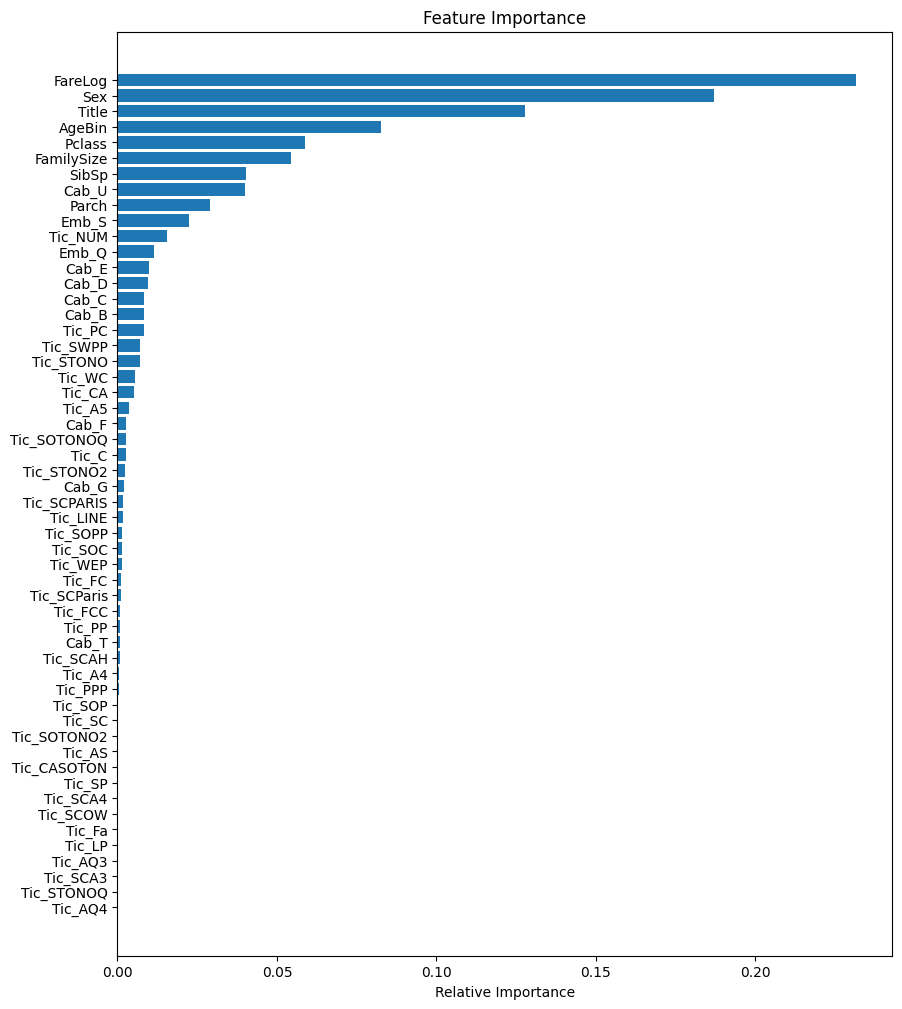

In [ ]:
# 위 함수 plot_importances 의 결과값으로 나온 feature_naems 리버스 리스트와, feature_imp 리버스 리스트를 각각 imp_features 와 imp scores 개체에 할당

imp_features, imp_scores = plot_importances(rf_model, selected_features)

5)-2. 위 에서 랭킹화한 중요한 피처 중 일부를 가지고 다시 모델 학습

* 위 랭킹 중 상위 10개 피처만 다시 선택

In [ ]:
selected_features = imp_features[:10]

y_train = data.loc[data['TrainSplit']=='Train', 'Survived']
X_train = data.loc[data['TrainSplit']=='Train', selected_features]

X_test = data.loc[data['TrainSplit']=='Test', selected_features]

print('Train 데이터셋 크기:', X_train.shape, y_train.shape)
print('Test 데이터셋 크기:', X_test.shape)


Train 데이터셋 크기: (891, 10) (891,)
Test 데이터셋 크기: (418, 10)


* 선택한 10개의 피처만을 가지고 **랜덤 포레스트 모델을 같은 조건에서 재학습**

In [ ]:
# 랜덤 포레스트로 선택한 10개의 피처만을 가지고 재학습

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(random_state=2020)

# 교차 검증
auc_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')

print('개별 Fold의 AUC 점수:', np.round(auc_scores, 4))
print('평균 AUC 점수:', np.round(np.mean(auc_scores), 4))

# 모델 훈련 및 예측
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)

# 제출
submission['Survived'] = y_test_pred.astype(int)
submission_filepath = drive_path + 'baseline_rf_submission_002.csv'
submission.to_csv(submission_filepath, index=False)


개별 Fold의 AUC 점수: [0.8679 0.8084 0.9028 0.8426 0.8849]
평균 AUC 점수: 0.8613


* 선택한 10개의 피처만을 가지고 **XGBoost 모델을 같은 조건에서 재학습**

In [ ]:
# XGBoost 로 선택한 10개의 피처만을 가지고 재학습

from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth = 3, random_state=2020)

# 교차 검증
auc_scores = cross_val_score(xgb_model, X_train, y_train, cv=3, scoring='roc_auc')

print('개별 Fold의 AUC 점수:', np.round(auc_scores, 4))
print('평균 AUC 점수:', np.round(np.mean(auc_scores), 4))

# 모델 훈련 및 예측
xgb_model.fit(X_train, y_train)
y_test_pred = xgb_model.predict(X_test)

# 제출
submission['Survived'] = y_test_pred.astype(int)
submission_filepath = drive_path + 'baseline_xgb_submission_001.csv'
submission.to_csv(submission_filepath, index=False)


개별 Fold의 AUC 점수: [0.8281 0.8879 0.894 ]
평균 AUC 점수: 0.87


5)-3. 분류 확률값
* 분류 레이블 (사망 0, 생존 1) 이 아닌 생존으로 분류할 확률값 (0~1) 예측 하기
* predict_proba 사용

In [ ]:
# 확률값 예측

y_xgb_proba = xgb_model.predict_proba(X_test)[:, 1] # 위의 xgboost 모델로 분류 확률값 예측하여 y_xgb_proba 개체에 할당
y_rf_proba = rf_model.predict_proba(X_test)[:, 1]   # 위의 random forest 모델로 분류 확률값 예측하여 y_rf_proba 개체에 할당

# 앙상블 기법

y_proba = (y_xgb_proba + y_rf_proba) / 2


# 제출
submission['Survived'] = y_proba

submission_filepath = drive_path + 'baseline_proba_submission_001.csv'
submission.to_csv(submission_filepath, index=False)
